##### Copyright 2018 The TensorFlow Authors.

1-210601001-Esma YETİŞ....%60

2-210601008-Gizem İlayda KOZ...%30

3-210601006-Zeynep Selime Alpa.%10

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image Classification using tf.keras

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c03_exercise_flowers_with_data_augmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c03_exercise_flowers_with_data_augmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this Colab you will classify images of flowers. You will build an image classifier using `tf.keras.Sequential` model and load data using `tf.keras.preprocessing.image.ImageDataGenerator`.


# Importing Packages

### Bu kod bloğu TensorFlow ve diğer gerekli kütüphaneleri içeriye aktarır. TensorFlow, makine öğrenimi ve derin öğrenme modelleri oluşturmak ve eğitmek için kullanılan popüler bir kütüphanedir.

 * from __future__ import absolute_import, division, print_function, unicode_literals ifadesi,  Python 2.x'den Python 3.x'e geçişte uyumluluk sağlamak için kullanılır. Bu ifade, Python 3.x dil özelliklerini kullanarak kod yazmamıza olanak tanır.

 * os, numpy, glob ve shutil gibi kütüphaneler dosya işlemleri, veri manipülasyonu ve sistem işlemleri gibi işlevleri gerçekleştirmek için kullanılır.

 * tensorflow kütüphanesi, derin öğrenme modelleri oluşturmak, eğitmek ve değerlendirmek için kullanılır.

* matplotlib.pyplot kütüphanesi, verilerin görselleştirilmesi için kullanılır ve plt takma adıyla kullanılır.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

### TODO: Import TensorFlow and Keras Layers

### Bu kod bloğu TensorFlow kütüphanesini içe aktarır ve ImageDataGenerator sınıfını kullanmak için gerekli paketleri içe aktarır. Ayrıca, Colab'da olduğunuzu kontrol eder ve TensorFlow'un belirli bir sürümünü kullandığımızı doğrular.

In [ ]:
#import packages
# try:
#   # Use the %tensorflow_version magic if in colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

### Bu kod bloğu, belirtilen bir URL'den çiçek fotoğraflarını içeren bir sıkıştırılmış dosyayı indirir ve çıkarır. Ardından, bu dosyaların bulunduğu dizini belirler.

* tf.keras.utils.get_file() fonksiyonu, belirtilen URL'den dosyayı indirir ve yerel bir dosya yoluna kaydeder. origin argümanı, indirilecek dosyanın URL'sini belirtir. fname argümanı, kaydedilecek dosyanın adını belirtir. extract argümanı ise True olarak ayarlandığında, dosya otomatik olarak çıkarılır.

* Son olarak, os.path.join() fonksiyonu ile indirilen dosyanın bulunduğu dizin ve "flower_photos" dizini birleştirilerek base_dir değişkenine atanır. Bu, daha sonra veri yüklemesi ve model eğitimi için kullanılacak olan veri dizinidir.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 [==============================] - 3s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes:

In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

### classes adlı bir liste oluşturulur ve içine "roses", "daisy", "dandelion", "sunflowers" ve "tulips" gibi çiçek türlerinin adları eklenir. Bu liste, veri kümesindeki her bir çiçeğin sınıfını temsil eder ve daha sonra modelin sınıflandırma yapmak için kullanacağı etiketlerdir.

İndirdiğimiz veri kümesinin dizin yapısı aşağıdaki gibidir:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

Bu dizin yapısı, "flower_photos" ana dizininde beş alt dizin içerir. Her bir alt dizin, belirli bir çiçek türünü temsil eder. Örneğin, "daisy" alt dizini, papatyaların görüntülerini içerir; "roses" alt dizini, güllerin görüntülerini içerir ve benzer şekilde diğer alt dizinler de diğer çiçek türlerinin görüntülerini içerir.

Bu dizin yapısı, veri kümesinin sınıflandırma görevi için kullanılacağı zaman, her bir alt dizinin bir sınıfı temsil edeceği anlamına gelir. Bu nedenle, veri kümesini yüklerken ve modeli eğitirken bu dizin yapısını göz önünde bulundurmak önemlidir.




**Yapılan işlemler sonucunda oluşturulan dizin yapısı şu şekildedir:**


<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>dandelion</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>roses</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>sunflowers</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>tulips</b>: [1.jpg, 2.jpg, 3.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

**Burada, flower_photos ana dizini altında beş farklı çiçek türü için alt dizinler bulunur. Oluşturulan eğitim ve doğrulama setleri train ve val adlı dizinlerde bulunur. Her bir çiçek türü, eğitim ve doğrulama setlerinde kendi alt dizinlerine sahiptir. Örneğin, train/daisy dizini, eğitim setindeki papatyaların görüntülerini içerir. Benzer şekilde, val/daisy dizini, doğrulama setindeki papatyaların görüntülerini içerir.**


In [ ]:
# total_train = 0
# total_val = 0
# for cl in classes:
#   img_path = os.path.join(base_dir, cl)
#   images = glob.glob(img_path + '/*.jpg')
#   print("{}: {} Images".format(cl, len(images)))
#   train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
#   total_train += len(train)
#   total_val += len(val)

#   for t in train:
#     if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#       os.makedirs(os.path.join(base_dir, 'train', cl))
#     shutil.move(t, os.path.join(base_dir, 'train', cl))

#   for v in val:
#     if not os.path.exists(os.path.join(base_dir, 'val', cl)):
#       os.makedirs(os.path.join(base_dir, 'val', cl))
#     shutil.move(v, os.path.join(base_dir, 'val', cl))

total_train = 0
total_val = 0

for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images) * 0.8)], images[round(len(images) * 0.8):]
    total_train += len(train)
    total_val += len(val)

    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        dest = os.path.join(base_dir, 'train', cl, os.path.basename(t))
        if os.path.exists(dest):
            os.remove(dest)  # Varolan dosyayı sil
        shutil.move(t, dest)  # Dosyayı taşı

    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        dest = os.path.join(base_dir, 'val', cl, os.path.basename(v))
        if os.path.exists(dest):
            os.remove(dest)  # Varolan dosyayı sil
        shutil.move(v, dest)  # Dosyayı taşı


roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


### Bu kod bloğu, verilen çiçek türlerinin görüntüleri üzerinde işlemler yapar ve eğitim ve doğrulama setlerini oluşturur. Her bir çiçek türü için belirtilen yüzdeye göre görüntüler eğitim ve doğrulama setlerine ayrılır.

* İlk olarak, her bir çiçek türü için görüntü yolları alınır ve kaç adet görüntü olduğu yazdırılır. Daha sonra, her bir çiçek türündeki görüntülerin yüzde 80'i eğitim setine, yüzde 20'si ise doğrulama setine ayrılır. Eğitim ve doğrulama setlerine ayrılan toplam görüntü sayısı hesaplanır.

* Sonrasında, her bir çiçek türündeki eğitim ve doğrulama setlerine ait görüntüler ilgili dizinlere taşınır. Eğer hedef dizinler yoksa oluşturulur ve var olan dosyalar taşınmadan önce kontrol edilerek, aynı isimde dosya varsa silinir. Bu işlem, her bir çiçek türü için eğitim ve doğrulama setlerinin oluşturulmasını sağlar.



* Bu çıktı, her bir çiçek türü için bulunan görüntü sayısını gösterir. Toplamda 641 gül, 633 papatya, 898 karahindiba, 699 ayçiçeği ve 799 lale görüntüsü bulunmaktadır. Bu görüntüler daha sonra eğitim ve doğrulama setlerine ayrılacak ve derin öğrenme modeli eğitiminde kullanılacaktır.

### Eğitim ve doğrulama setlerindeki toplam görüntü sayısını hesaplamak için len(train) + len(val) işlemi yapılır. Bu işlem eğitim setindeki ve doğrulama setindeki görüntülerin sayısını toplar ve sonucu verir.

* Bu işlem sonucunda, eğitim ve doğrulama setlerindeki toplam görüntü sayısı bulunur.

In [ ]:
len(train)+len(val)

799

### Toplam eğitim seti görüntü sayısı, total_train değişkeni tarafından saklanır ve ekrana yazdırılır. Bu değişken, eğitim setindeki tüm çiçek türlerine ait görüntülerin sayısını içerir. Bu değer, eğitim setindeki toplam görüntü sayısını temsil eder.

In [ ]:
total_train

2935

### Bu kod, eğitim ve doğrulama setlerinin dizinlerini oluşturmak için kullanılır.

* train_dir değişkeni, base_dir değişkeni ile 'train' alt dizinini birleştirerek eğitim setinin dizinini oluşturur.

* val_dir değişkeni ise base_dir değişkeni ile 'val' alt dizinini birleştirerek doğrulama setinin dizinini oluşturur.

**Bu dizinler, eğitim ve doğrulama setlerindeki çiçek görüntülerinin bulunduğu ana dizinlerdir. Bu yollar daha sonra veri yüklemesi için kullanılacaktır.**

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Data Augmentation

Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In **tf.keras** we can implement this using the same **ImageDataGenerator** class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

### batch_size ve IMG_SHAPE sabitleri, derin öğrenme modelinin eğitiminde kullanılacak olan parametrelerdir.

* batch_size, eğitim sırasında kullanılacak olan her bir parti (batch) içerisinde bulunacak olan görüntü sayısını belirler. Bu değer ne kadar büyükse, eğitim işlemi o kadar hızlı gerçekleşir ancak daha fazla bellek kullanılır. Tersine, bu değer ne kadar küçükse, eğitim işlemi daha yavaş gerçekleşir ancak daha az bellek kullanılır.

* IMG_SHAPE, modele beslenecek olan görüntülerin boyutunu belirler. Örneğin, 150x150 piksel boyutunda bir görüntü, 150 piksel genişliğinde ve 150 piksel yüksekliğindedir. Bu değer, modele veri beslemek için kullanılacak olan görüntülerin boyutunu belirler ve modele giriş boyutunu etkiler. Daha büyük görüntüler daha fazla ayrıntı içerebilir ancak daha fazla hesaplama gücü gerektirir.

In [ ]:
batch_size = 100
IMG_SHAPE = 150

### Bu kod, TensorFlow'un Keras API'si aracılığıyla görüntü verilerini önişlemek için kullanılan ImageDataGenerator sınıfını içe aktarır.

* image_gen değişkeni, ImageDataGenerator sınıfından bir örnek oluşturur. Bu örnekleme sırasında, rescale=1./255 argümanı görüntü piksel değerlerini [0, 1] aralığına ölçekler. Bu, piksel değerlerini 0 ile 255 arasından 0 ile 1 arasına dönüştürerek veri normalizasyonu sağlar. horizontal_flip=True argümanı ise görüntüleri yatay olarak döndürme işlemi gerçekleştirir. Bu, veri artırma tekniklerinden biridir ve modelin daha genelleştirilmiş özellikler öğrenmesine yardımcı olabilir.

* train_data_gen değişkeni, image_gen nesnesinin flow_from_directory metodu kullanılarak eğitim veri kümesi için bir veri üreteci (data generator) oluşturur. Bu veri üreteci, train_dir dizinindeki görüntülerden mini-batch'ler oluşturarak modelin eğitim sırasında kullanması için veri sağlar. batch_size argümanı, her bir mini-batch'de bulunacak olan görüntü sayısını belirler. target_size=(IMG_SHAPE, IMG_SHAPE) argümanı, modelin giriş boyutunu belirtir ve görüntülerin bu boyuta ölçeklenmesini sağlar. shuffle=True argümanı, her bir epoch öncesi eğitim verilerini karıştırır ve modelin farklı örnekler arasında öğrenme yapmasına yardımcı olur.

**Bu çıktıya göre, toplam 2935 görüntü bulunmaktadır ve bu görüntüler 5 farklı sınıfa aittir. Bu sınıflar, veri kümesindeki çiçek türlerini temsil eder. Bu bilgi, modelin eğitimi için kullanılacak olan veri kümesinin boyutunu ve sınıf sayısını gösterir.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2935 images belonging to 5 classes.


### Bu kod bloğu, verilen bir görüntü dizisini bir 1 satır ve 5 sütunlu bir ızgara şeklinde görselleştirmek için bir işlev tanımlar ve kullanır.

* plotImages adlı fonksiyon, images_arr adlı bir görüntü dizisi alır ve bu diziyi 1 satır ve 5 sütunlu bir ızgara şeklinde görselleştirir. Her bir görüntü, bir sütunda yer alır ve 5 sütun içerir. Görüntüler, imshow() fonksiyonuyla eksenlere yerleştirilir.

* augmented_images adlı bir liste, train_data_gen veri üretecinin ilk öğesinden (bir mini-batch) alınan ilk görüntüden (train_data_gen[0][0][0]) oluşur. Bu işlem, eğitim veri kümesinden bir mini-batch alır ve bu mini-batch'in ilk görüntüsünü kullanarak bir dizi artırılmış görüntü oluşturur.

* Son olarak, plotImages fonksiyonu çağrılır ve augmented_images listesi görüntülenir. Bu işlem, artırılmış görüntülerin bir ızgara şeklinde gösterilmesini sağlar.

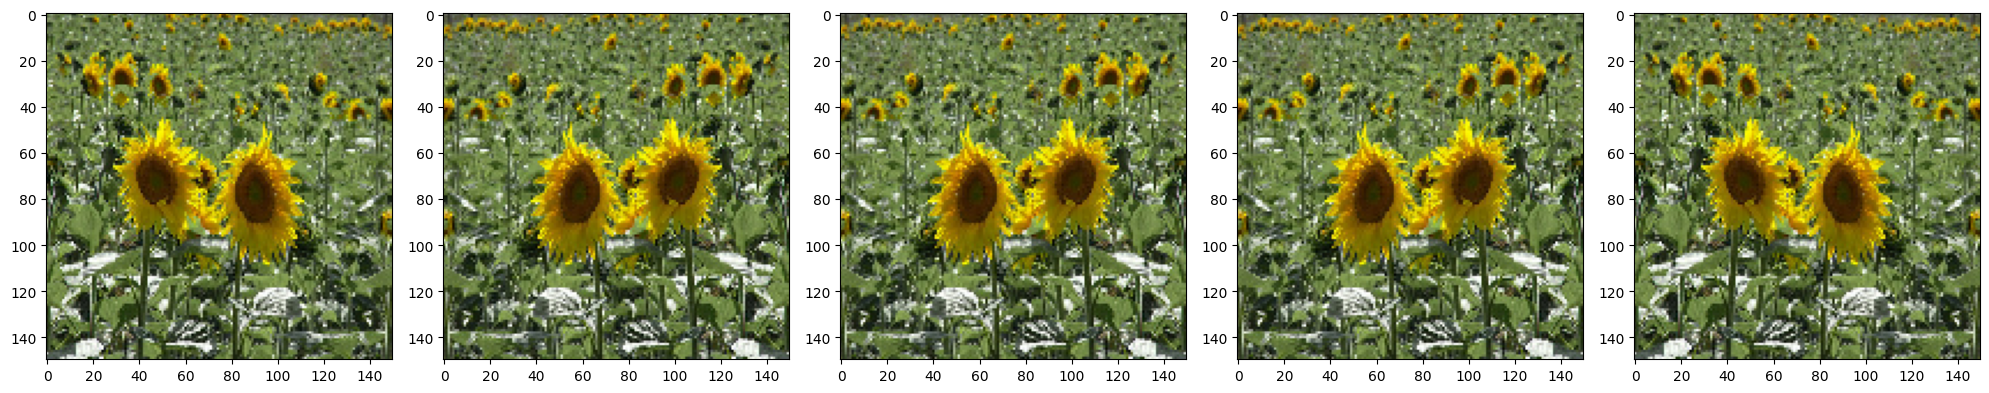

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Bu kod bloğu, görüntü artırma işlemlerinden biri olan döndürme işlemini uygulamak için rotation_range parametresini kullanır.

* ImageDataGenerator sınıfından bir örnek oluşturulurken, rotation_range=45 argümanı ile döndürme aralığı 45 derece olarak belirlenir. Bu, her bir görüntünün rastgele olarak en fazla 45 derece saat yönünde veya saat yönünün tersine döndürülmesini sağlar.

* Daha sonra, flow_from_directory yöntemi kullanılarak eğitim veri kümesi için bir veri üreteci oluşturulur. Bu veri üreteci, train_dir dizinindeki görüntülerden mini-batch'ler oluşturarak modelin eğitim sırasında kullanması için veri sağlar.

**Bu işlem, eğitim veri kümesindeki görüntülere döndürme işlemi uygulanmış bir veri üreteci oluşturur. Bu sayede, modelin daha genelleştirilmiş özellikler öğrenmesi sağlanabilir.**

In [ ]:
image_gen =  ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory= train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2935 images belonging to 5 classes.


### Bu kod bloğu, döndürme işlemi uygulanmış artırılmış görüntüleri görselleştirmek için plotImages fonksiyonunu kullanır.

* train_data_gen[0][0][0] ifadesi, train_data_gen veri üretecinin ilk öğesinden (bir mini-batch) alınan ilk görüntüyü temsil eder. Bu görüntü, döndürme işlemi uygulanmış artırılmış bir görüntüdür.

* augmented_images adlı bir liste, bu artırılmış görüntünün 5 kopyasını içerir. Her bir kopya, for döngüsü aracılığıyla oluşturulur ve listeye eklenir.

* Daha sonra, plotImages fonksiyonu çağrılarak augmented_images listesi görselleştirilir. Bu işlem, döndürme işlemi uygulanmış artırılmış görüntülerin bir ızgara şeklinde gösterilmesini sağlar.

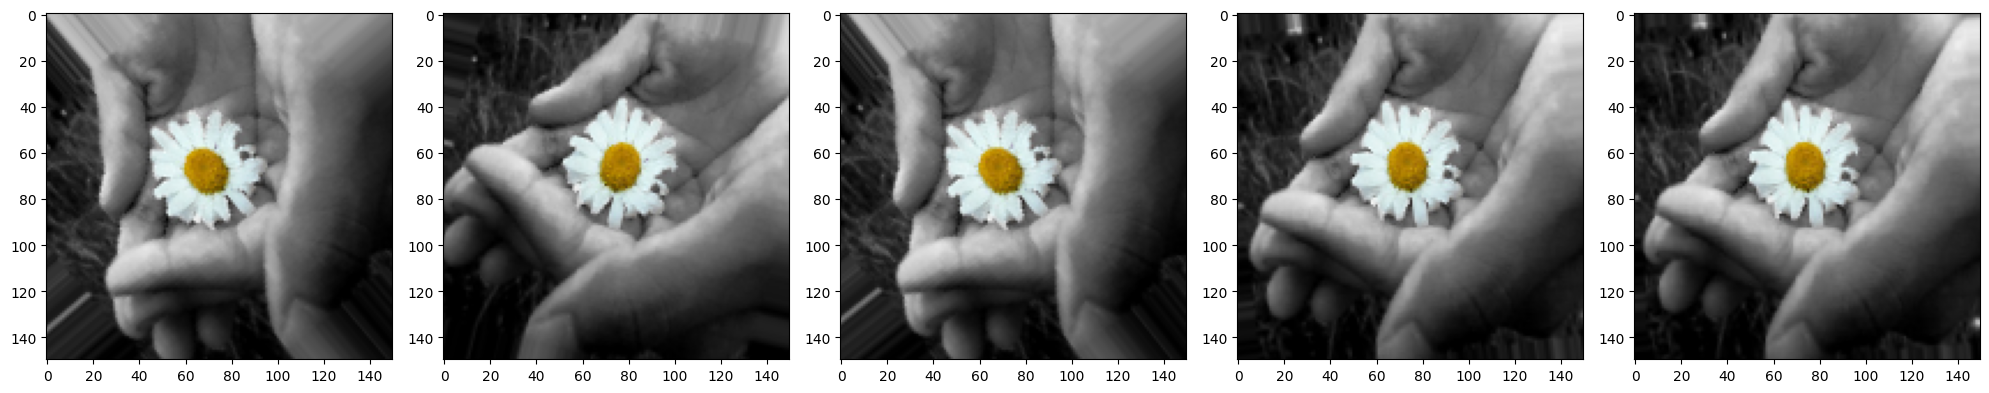

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Bu kod bloğu, görüntü artırma işlemlerinden biri olan yakınlaştırma işlemini uygulamak için zoom_range parametresini kullanır.

ImageDataGenerator sınıfından bir örnek oluşturulurken, zoom_range=0.5 argümanı ile yakınlaştırma aralığı belirlenir. Bu, her bir görüntünün rastgele olarak yüzde 50 oranında yakınlaştırılmasını veya uzaklaştırılmasını sağlar.

Daha sonra, flow_from_directory yöntemi kullanılarak eğitim veri kümesi için bir veri üreteci oluşturulur. Bu veri üreteci, train_dir dizinindeki görüntülerden mini-batch'ler oluşturarak modelin eğitim sırasında kullanması için veri sağlar.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2935 images belonging to 5 classes.



Toplamda 2935 görüntü bulundu ve bunlar 5 sınıfa ait.

### Bu kod bloğu, yakınlaştırma işlemi uygulanmış artırılmış görüntüleri görselleştirmek için plotImages fonksiyonunu kullanır.

* train_data_gen[0][0][0] ifadesi, train_data_gen veri üretecinin ilk öğesinden (bir mini-batch) alınan ilk görüntüyü temsil eder. Bu görüntü, yakınlaştırma işlemi uygulanmış artırılmış bir görüntüdür.

* augmented_images adlı bir liste, bu artırılmış görüntünün 5 kopyasını içerir. Her bir kopya, for döngüsü aracılığıyla oluşturulur ve listeye eklenir.

* Daha sonra, plotImages fonksiyonu çağrılarak augmented_images listesi görselleştirilir. Bu işlem, yakınlaştırma işlemi uygulanmış artırılmış görüntülerin bir ızgara şeklinde gösterilmesini sağlar.

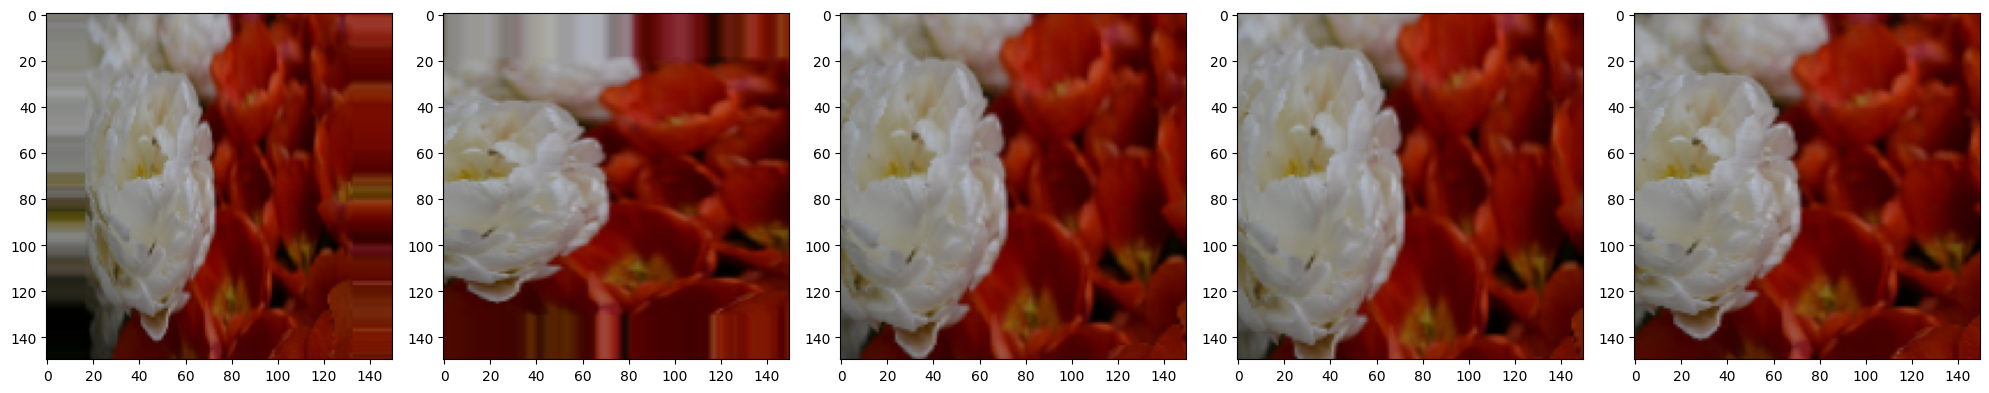

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Bu kod, eğitim veri kümesindeki görüntülere birden fazla artırma işlemi uygulamak için ImageDataGenerator sınıfını kullanır.

* rotation_range=45 argümanı, her bir görüntünün rastgele olarak en fazla 45 derece saat yönünde veya saat yönünün tersine döndürülmesini sağlar.

* zoom_range=0.5 argümanı, her bir görüntünün rastgele olarak yüzde 50 oranında yakınlaştırılmasını veya uzaklaştırılmasını sağlar.

* horizontal_flip=True argümanı, her bir görüntünün yatay olarak rastgele olarak döndürülmesini sağlar.

* width_shift_range=0.15 ve height_shift_range=0.15 argümanları, her bir görüntünün rastgele olarak yüzde 15 oranında yatay ve dikey olarak kaydırılmasını sağlar.

* Son olarak, flow_from_directory yöntemi kullanılarak eğitim veri kümesi için bir veri üreteci oluşturulur. Bu veri üreteci, belirtilen artırma işlemlerini uygulayarak modelin eğitim sırasında kullanması için artırılmış görüntüler sağlar. class_mode="sparse" argümanı, sınıfların dizinlerle temsil edildiğini belirtir. Bu, çok sınıflı sınıflandırma problemleri için uygun bir sınıf modudur.

In [ ]:
image_gen_train= ImageDataGenerator(rescale=1./255, rotation_range=45, zoom_range=0.5, horizontal_flip=True, width_shift_range=0.15, height_shift_range=0.15)


train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, directory= train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode="sparse")


Found 2935 images belonging to 5 classes.


### Bu kod, eğitim veri kümesinden bir mini-batch alır ve bu mini-batch içindeki ilk görüntüye uygulanan artırma işlemlerini görselleştirmek için kullanılır.

* train_data_gen[0][0][0] ifadesi, train_data_gen veri üretecinin ilk öğesinden (bir mini-batch) alınan ilk görüntüyü temsil eder.

* for döngüsü, bu işlemi 5 kez tekrarlar ve her bir artırılmış görüntüyü augmented_images listesine ekler.

* Son olarak, plotImages fonksiyonu çağrılarak augmented_images listesi görselleştirilir ve artırılmış görüntülerin bir ızgara şeklinde gösterilmesi sağlanır.

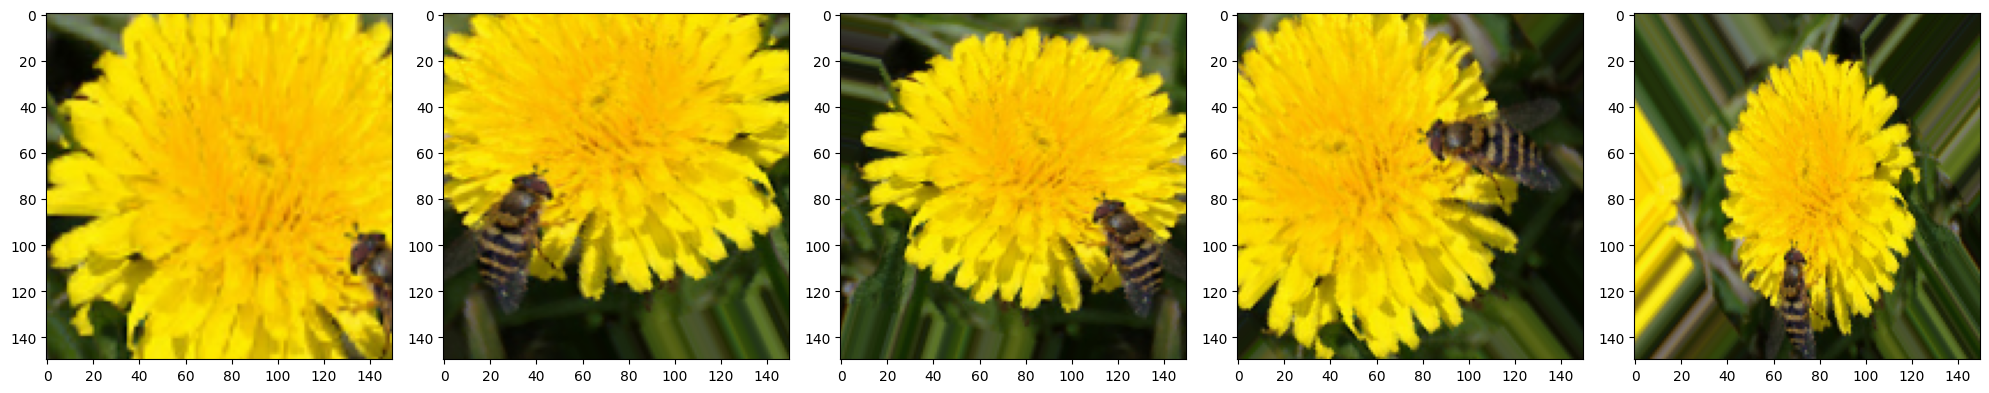

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Bu kod bloğu, doğrulama veri kümesi için bir veri üreteci oluşturmak için ImageDataGenerator sınıfını kullanır.

* ImageDataGenerator sınıfından bir örnek oluşturulurken, yalnızca rescale=1./255 argümanı kullanılır. Bu, görüntü piksel değerlerini [0, 1] aralığına ölçekler ve veri normalizasyonu sağlar.

* Daha sonra, flow_from_directory yöntemi kullanılarak doğrulama veri kümesi için bir veri üreteci oluşturulur. Bu veri üreteci, val_dir dizinindeki görüntülerden mini-batch'ler oluşturarak modelin doğrulama sırasında kullanması için veri sağlar.

* class_mode="sparse" argümanı, sınıfların dizinlerle temsil edildiğini belirtir. Bu, çok sınıflı sınıflandırma problemleri için uygun bir sınıf modudur.

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, directory=val_dir, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode="sparse")


Found 735 images belonging to 5 classes.


# TODO: Create the CNN

### Bu kod bloğu, bir evrişimli sinir ağı modeli tanımlar. Model, sırasıyla evrişimli katmanlar, havuzlama katmanları, dropout katmanı, düzleştirme katmanı ve tam bağlantılı (dense) katmanlar içerir.

* tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)): 16 adet 3x3 boyutunda evrişimli filtre ile evrişimli katman. ReLU aktivasyon fonksiyonu kullanılır. Giriş şekli, (IMG_SHAPE, IMG_SHAPE, 3) boyutunda olmalıdır.

* tf.keras.layers.MaxPooling2D((2,2)): 2x2 boyutunda maksimum havuzlama katmanı.

**Yukarıdaki iki katmanın ikincil bloğu birbirini takip ederek 3 kez tekrarlanır.**

* tf.keras.layers.Dropout(0.2): Aşırı öğrenmeyi azaltmak için %20 dropout oranıyla dropout katmanı.

* tf.keras.layers.Flatten(): Evrişimli katmanlardan gelen çıktıları düzleştirme katmanı. Bu, verileri düz bir vektöre dönüştürür ve tam bağlantılı katmanlara besler.

* tf.keras.layers.Dense(512, activation='relu'): 512 nöronlu tam bağlantılı katman. ReLU aktivasyon fonksiyonu kullanılır.

* tf.keras.layers.Dense(5, activation='softmax'): 5 sınıfa karşılık gelen çıktıları veren son tam bağlantılı katman. Softmax aktivasyon fonksiyonu kullanılır, böylece sınıf olasılıkları elde edilir.

**Bu model, çok sınıflı sınıflandırma problemleri için uygundur ve çıktı olarak 5 sınıfı tahmin eder.**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])



# TODO: Compile the Model


### Bu kod, modelin derlenmesini gerçekleştirir. Derleme işlemi sırasında, model için bir optimizasyon algoritması belirlenir (adam), bir kayıp fonksiyonu seçilir (sparse_categorical_crossentropy) ve eğitim sırasında izlenecek metrikler belirlenir (accuracy).

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# TODO: Train the Model

### Bu kod, modelin eğitimini gerçekleştirir. fit_generator yöntemi kullanılarak model eğitilir.

* train_data_gen: Eğitim veri üreteci belirtilir. Bu veri üreteci, eğitim veri kümesinden mini-batch'ler oluşturarak modelin eğitimi için veri sağlar.

* steps_per_epoch=int(np.ceil(total_train/float(batch_size))): Bir epoch'ta tamamlanacak adım sayısı belirlenir. Toplam eğitim verisi sayısı ile mini-batch boyutu arasındaki bölümün yukarıya yuvarlanmış değeri alınır.

* epochs=epochs: Modelin kaç epoch boyunca eğitileceği belirlenir. Bir epoch, tüm eğitim verilerinin model tarafından bir kere işlenmesidir.

* validation_data=val_data_gen: Doğrulama veri üreteci belirlenir. Bu veri üreteci, doğrulama veri kümesinden mini-batch'ler oluşturarak modelin performansını değerlendirmek için veri sağlar.

* validation_steps=int(np.ceil(total_val/float(batch_size))): Doğrulama işlemi sırasında kullanılacak adım sayısı belirlenir. Toplam doğrulama verisi sayısı ile mini-batch boyutu arasındaki bölümün yukarıya yuvarlanmış değeri alınır.

**Bu şekilde, model belirtilen sayıda epoch boyunca eğitilir ve eğitim sırasında ve doğrulama sırasında belirtilen metrikler (accuracy) kaydedilir. Eğitim geçmişi (history değişkeni) döndürülür, böylece daha sonra eğitim sürecinin görselleştirilmesi ve değerlendirilmesi mümkün olur.**

In [ ]:
epochs = 80

history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(total_train/float(batch_size))),
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(total_val/float(batch_size))))

<ipython-input-21-91024f70a2a8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/80
30/30 [==============================] - 29s 714ms/step - loss: 1.5435 - accuracy: 0.3015 - val_loss: 1.3520 - val_accuracy: 0.4340
Epoch 2/80
30/30 [==============================] - 23s 753ms/step - loss: 1.2103 - accuracy: 0.4807 - val_loss: 1.0768 - val_accuracy: 0.5483
Epoch 3/80
30/30 [==============================] - 23s 769ms/step - loss: 1.1064 - accuracy: 0.5462 - val_loss: 1.0454 - val_accuracy: 0.5701
Epoch 4/80
30/30 [==============================] - 21s 715ms/step - loss: 1.0599 - accuracy: 0.5639 - val_loss: 1.0161 - val_accuracy: 0.5687
Epoch 5/80
30/30 [==============================] - 22s 741ms/step - loss: 0.9891 - accuracy: 0.6024 - val_loss: 0.9231 - val_accuracy: 0.6503
Epoch 6/80
30/30 [==============================] - 21s 698ms/step - loss: 0.9505 - accuracy: 0.6276 - val_loss: 0.9053 - val_accuracy: 0.6449
Epoch 7/80
30/30 [==============================] - 22s 721ms/step - loss: 0.8946 - accuracy: 0.6453 - val_loss: 0.8281 - val_accuracy: 0.6667

# TODO: Plot Training and Validation Graphs.

**history** değişkeni, modelin eğitimi sırasında elde edilen metrik değerlerini içerir. Bu değerler, eğitim sürecindeki kayıp ve doğruluk gibi metriklerin epoch bazında kaydedilmiş değerleridir. Bu bilgi, modelin eğitim sürecinin ilerleyişi hakkında bilgi edinmek ve sonuçları değerlendirmek için kullanılabilir.

In [ ]:
history

### Bu kod bloğu, modelin eğitimi sırasında kaydedilen doğruluk ve kayıp metriklerini görselleştirmek için kullanılır.

* **acc ve val_acc** değişkenleri, eğitim ve doğrulama sırasında elde edilen doğruluk değerlerini içerir.
* **loss ve val_loss** değişkenleri, eğitim ve doğrulama sırasında elde edilen kayıp değerlerini içerir.
* **epochs_range,** eğitim sürecindeki epoch sayısını temsil eder.
Bu metrikler, her epoch sonunda kaydedilmiş olduğundan, epoch aralığı boyunca bu değerlerin değişimini görselleştirmek için matplotlib kütüphanesi kullanılır.

### İki grafik aynı figür içinde yan yana gösterilir:

* Sol grafikte, eğitim ve doğrulama sırasında elde edilen **doğruluk** değerleri gösterilir.
* Sağ grafikte, eğitim ve doğrulama sırasında elde edilen **kayıp** değerleri gösterilir.
**Her iki grafik de, epoch sayısına göre doğruluk ve kayıp değerlerinin değişimini gösterir. Bu, modelin eğitimi sırasında performansının nasıl değiştiğini görsel olarak analiz etmek için kullanılır.*

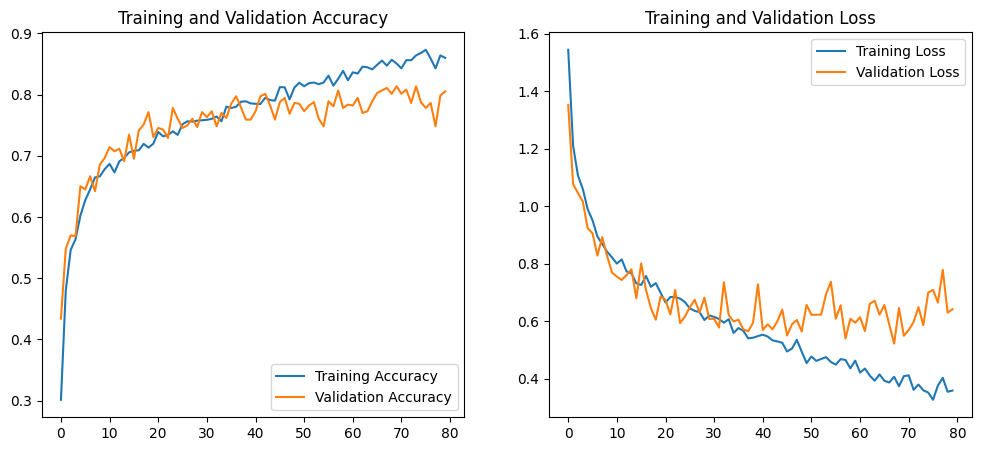

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**model.summary()** yöntemi, modelin özetini sağlar. Bu özet, modelin katmanlarını ve her bir katmandaki parametre sayısını gösterir. Modelin toplam parametre sayısı da dahil olmak üzere modelin yapısını hızlıca görmek için kullanılır.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

# TODO: Experiment with Different Parameters

Bu kod örneği, çiçek resimlerinden oluşan bir veri kümesi üzerinde evrişimli sinir ağı (CNN) modelinin eğitimini gerçekleştirir ve sonuçları görselleştirir. İşlemler şu adımlarla gerçekleştirilir:

* İlk olarak, gerekli kütüphaneler ve paketler içe aktarılır. Bu, TensorFlow, işletim sistemi işlevleri için **os**, dosya yollarını genişletmek için **glob,** dosya kopyalamak ve taşımak için **shutil,** resimleri görselleştirmek için **matplotlib.pyplot** ve sayısal işlemler için **numpy** içerir.

* Veri kümesinin indirme URL'si belirtilir ve **tf.keras.utils.get_file()** yöntemi kullanılarak veri kümesi indirilir ve çıkartılır. İndirilen veri kümesinin dizin yolu belirlenir.
* Veri kümesindeki sınıflar (çiçek türleri) belirlenir.
* Her sınıf için eğitim ve doğrulama setlerinin oluşturulması gerekmektedir. Bu adım, her sınıf için belirli bir yüzdeye göre veri kümesinin bölünmesini ve ilgili sınıf klasörlerine taşınmasını içerir.
* Eğitim ve doğrulama setlerinin boyutlarının hesaplanması için **total_train ve total_val** değişkenleri tanımlanır. Bu değişkenler daha sonra kullanılmak üzere başlangıçta sıfıra eşitlenir.
* Her sınıf için eğitim ve doğrulama resimlerinin kopyalanması işlemi gerçekleştirilir. Bu işlem sırasında her sınıf için belirli bir yüzde eğitim ve doğrulama setine ayrılır.
* Veri artırma (data augmentation) için bir **ImageDataGenerator** nesnesi oluşturulur. Bu nesne, eğitim veri setindeki resimlere uygulanacak dönüşümleri belirler. Burada resimler, 0 ile 1 arasında ölçeklenir ve yatay olarak çevrilir (horizontal flip) ve döndürülür (rotation) gibi dönüşümlere tabi tutulur.
* ImageDataGenerator nesnesi kullanılarak eğitim veri seti oluşturulur ve veri artırma dönüşümleri uygulanır.
* Oluşturulan eğitim veri setinden örnekler alınarak, veri artırma işleminin sonuçlarını görselleştirmek için bir fonksiyon tanımlanır ve bu fonksiyon çağrılır.
* Doğrulama veri seti için de bir ImageDataGenerator nesnesi oluşturulur.
* ImageDataGenerator nesnesi kullanılarak doğrulama veri seti oluşturulur. Bu işlemde, sadece ölçeklendirme işlemi uygulanır.
* Evrişimli sinir ağı **(CNN)** modeli oluşturulur:

Bu katmanlar, evrişim ve havuzlama katmanlarından oluşan bir CNN mimarisini tanımlar. Model, 3 evrişim katmanı, 3 maksimum havuzlama katmanı, bir dropout katmanı ve iki tam bağlı (fully connected) katmandan oluşur.
* Model derlenir ve eğitilir.
* Modelin eğitimi sırasında elde edilen doğruluk ve kayıp metriklerini görselleştirmek için grafikler oluşturulur.

**Bu kod, eğitim sürecinin her bir epoch için doğruluk ve kayıp değerlerini gösteren iki grafik oluşturur. Bir grafik, eğitim ve doğrulama doğruluğunu, diğer grafik ise eğitim ve doğrulama kaybını gösterir. Bu grafikler, modelin performansının izlenmesine yardımcı olur.**





roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images
Found 2935 images belonging to 5 classes.


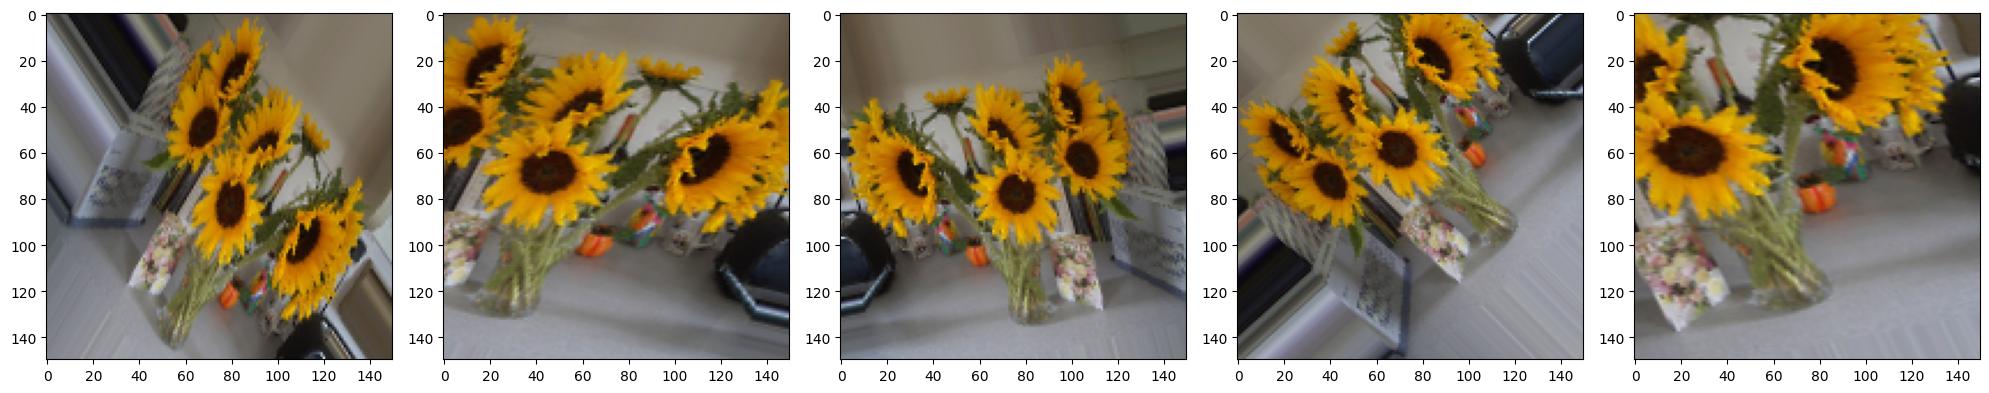

Found 735 images belonging to 5 classes.


<ipython-input-25-a3f6e075e182>:98: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/35
30/30 [==============================] - 26s 747ms/step - loss: 1.4960 - accuracy: 0.3165 - val_loss: 1.3173 - val_accuracy: 0.4109
Epoch 2/35
30/30 [==============================] - 22s 740ms/step - loss: 1.2326 - accuracy: 0.4695 - val_loss: 1.1520 - val_accuracy: 0.5333
Epoch 3/35
30/30 [==============================] - 22s 725ms/step - loss: 1.1436 - accuracy: 0.5230 - val_loss: 1.0120 - val_accuracy: 0.6014
Epoch 4/35
30/30 [==============================] - 22s 752ms/step - loss: 1.0573 - accuracy: 0.5826 - val_loss: 1.0290 - val_accuracy: 0.5918
Epoch 5/35
30/30 [==============================] - 22s 729ms/step - loss: 1.0148 - accuracy: 0.5939 - val_loss: 0.8970 - val_accuracy: 0.6531
Epoch 6/35
30/30 [==============================] - 24s 821ms/step - loss: 0.9635 - accuracy: 0.6164 - val_loss: 0.8273 - val_accuracy: 0.6776
Epoch 7/35
30/30 [==============================] - 24s 797ms/step - loss: 0.9211 - accuracy: 0.6365 - val_loss: 0.8047 - val_accuracy: 0.6803

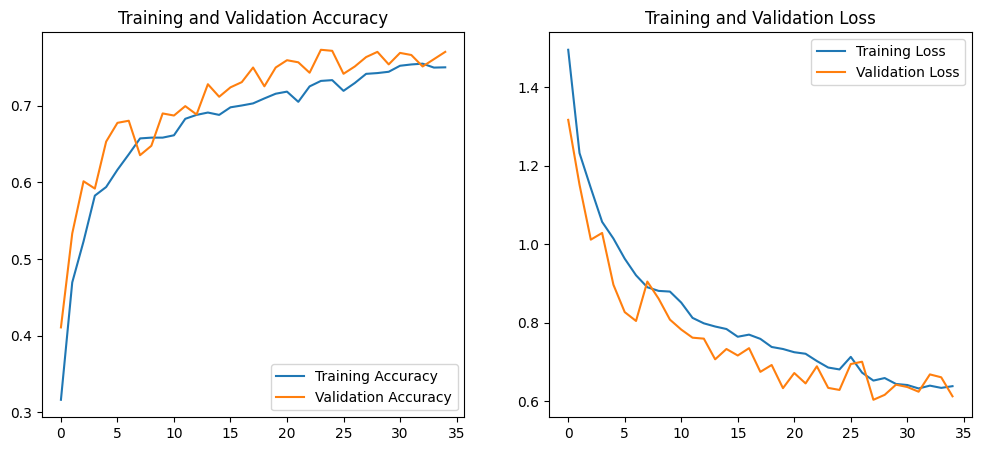

In [ ]:
import os
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')


classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

total_train = 0
total_val = 0
for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images) * 0.8)], images[round(len(images) * 0.8):]
    total_train += len(train)
    total_val += len(val)

    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        dest = os.path.join(base_dir, 'train', cl, os.path.basename(t))
        if os.path.exists(dest):
            os.remove(dest)  # Varolan dosyayı sil
        shutil.copy(t, dest)  # Dosyayı kopyala

    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        dest = os.path.join(base_dir, 'val', cl, os.path.basename(v))
        if os.path.exists(dest):
            os.remove(dest)  # Varolan dosyayı sil
        shutil.copy(v, dest)  # Dosyayı kopyala


train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Data augmentation
batch_size = 100
IMG_SHAPE = 150

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


image_gen_train = ImageDataGenerator(rescale=1./255, rotation_range=45, zoom_range=0.5, horizontal_flip=True, width_shift_range=0.15, height_shift_range=0.15)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode="sparse")

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, directory=val_dir, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode="sparse")

# Create the model (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 35

history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(total_train/float(batch_size))),
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(total_val/float(batch_size))))

# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Bu çıktı, toplamda beş farklı çiçek türü için belirli bir veri kümesinin içeriğini göstermektedir. Her bir çiçek türü için kaç adet resim olduğu belirtilmiştir

Ayrıca, toplamda 2935 resmin bulunduğu ve bu resimlerin 5 farklı sınıfa ait olduğu belirtilmektedir. Bu çıktı, veri kümesinin boyutunu ve sınıflar arasındaki dağılımını göstermektedir.